<a href="https://colab.research.google.com/github/RAVIAPTISWETHA/-Deep-Learning-Applications-in-Heart-Diseases-Using-ECG-Signals/blob/main/DLA_Heart_Diseases_using_ECG_Signals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Installing Libraries**


In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Data Loading**

In [3]:
dir_train = '/content/drive/My Drive/Colab Notebooks/ECGK/ECG/train'
dir_test = '/content/drive/My Drive/Colab Notebooks/ECGK/ECG/test'
dir_mendeley = '/content/drive/My Drive/Colab Notebooks/ECGM'

In [4]:
def dataloader(dir ):
    folders = os.listdir(dir)
    file_path = []
    labels = []
    sub_folders =[]
    for folder in folders:
        sub_folder = os.path.join(dir, folder)
        sub_list = os.listdir(sub_folder)
        for file in sub_list:
            f_path = os.path.join(sub_folder, file)
            file_path.append(f_path)
            labels.append(folder)
    return file_path, labels
train_file_path, train_labels = dataloader(dir_train )
print(len(train_file_path))
test_file_path, test_labels = dataloader(dir_test )
mendeley_path, mendeley_labels = dataloader(dir_mendeley )
combined_filepath = test_file_path + train_file_path + mendeley_path
combined_labels = train_labels +  test_labels + mendeley_labels
print(len(combined_filepath))
df = pd.DataFrame({'file_path': combined_filepath, "labels": combined_labels})
df.labels.value_counts()

3023
4658


,count
labels,
ECG Images of Myocardial Infarction Patients (240x12=2880),1195
Normal Person ECG Images (284x12=3408),1136
ECG Images of Patient that have abnormal heartbeat (233x12=2796),932
ECG Images of Patient that have History of MI (172x12=2064),688
Normal Person,295
Abnormal heartbeat,241
History of MI,171


In [5]:
df['labels'] = df['labels'].replace("ECG Images of Myocardial Infarction Patients (240x12=2880)", "History of MI")
df['labels'] = df['labels'].replace("ECG Images of Patient that have History of MI (172x12=2064)", "History of MI")
df['labels'] = df['labels'].replace("ECG Images of Patient that have abnormal heartbeat (233x12=2796)", "Abnormal heartbeat")
df['labels'] = df['labels'].replace("Normal Person ECG Images (284x12=3408)", "Normal Person")
df.labels.value_counts()

,count
labels,
History of MI,2054
Normal Person,1431
Abnormal heartbeat,1173


# **Class Distribution**

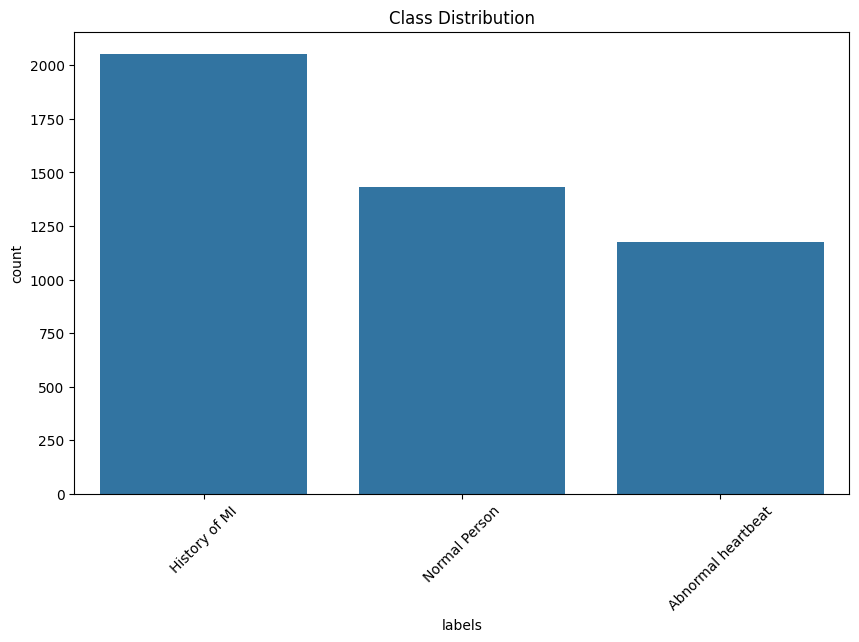

In [6]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='labels', order=df['labels'].value_counts().index)
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.show()

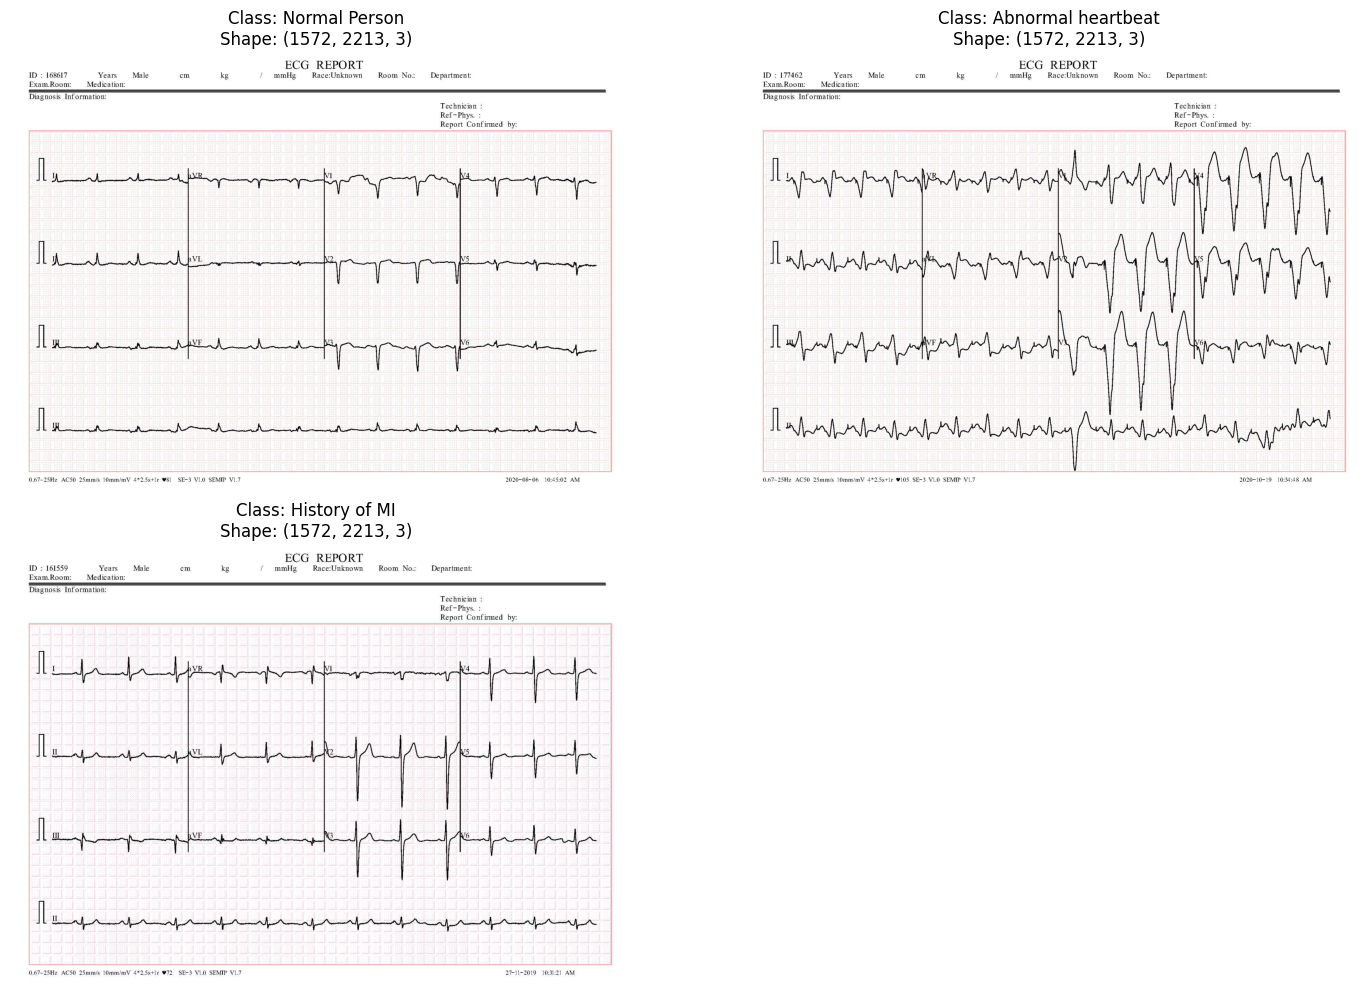

In [7]:
import matplotlib.image as mpimg

# Display sample images from each class
plt.figure(figsize=(15,10))
for i, label in enumerate(df['labels'].unique()):
    sample_path = df[df['labels']==label]['file_path'].iloc[0]
    img = mpimg.imread(sample_path)

    plt.subplot(2,2,i+1)
    plt.imshow(img, cmap='gray' if len(img.shape)==2 else None)
    plt.title(f"Class: {label}\nShape: {img.shape}")
    plt.axis('off')
plt.tight_layout()
plt.show()